# **Import data and lib**

In [2]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt, seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [3]:

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/student-performance-predictions/st.ipynb
/kaggle/input/student-performance-predictions/student_performance.csv
/kaggle/input/student-performance-predictions/best_student_performance_model.pkl


In [4]:
df = pd.read_csv('/kaggle/input/student-performance-predictions/student_performance.csv')

# **Exploratory data analysis**

In [5]:
df.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   StudentID                  10 non-null     int64 
 1   Name                       10 non-null     object
 2   Gender                     10 non-null     object
 3   AttendanceRate             10 non-null     int64 
 4   StudyHoursPerWeek          10 non-null     int64 
 5   PreviousGrade              10 non-null     int64 
 6   ExtracurricularActivities  10 non-null     int64 
 7   ParentalSupport            10 non-null     object
 8   FinalGrade                 10 non-null     int64 
dtypes: int64(6), object(3)
memory usage: 848.0+ bytes


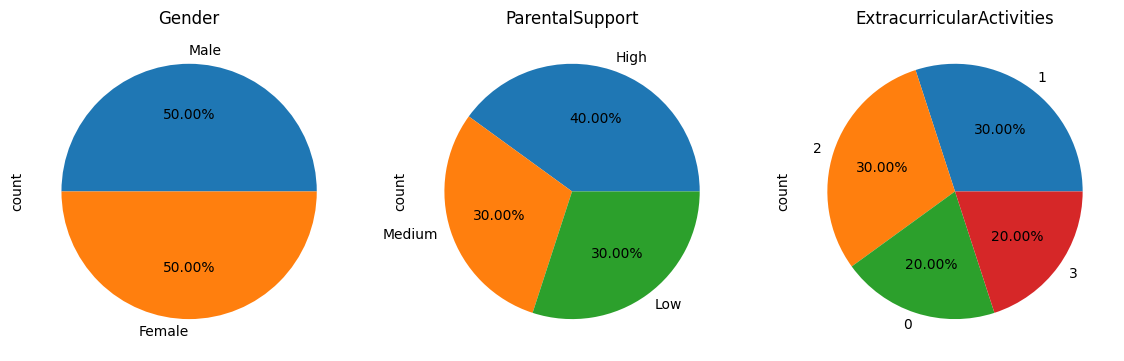

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(14, 7))
df['Gender'].value_counts().plot.pie(autopct='%.2f%%', ax=axs[0], title='Gender')
df['ParentalSupport'].value_counts().plot.pie(autopct='%.2f%%', ax=axs[1], title='ParentalSupport')
df['ExtracurricularActivities'].value_counts().plot.pie(autopct='%.2f%%', ax=axs[2], title='ExtracurricularActivities')

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


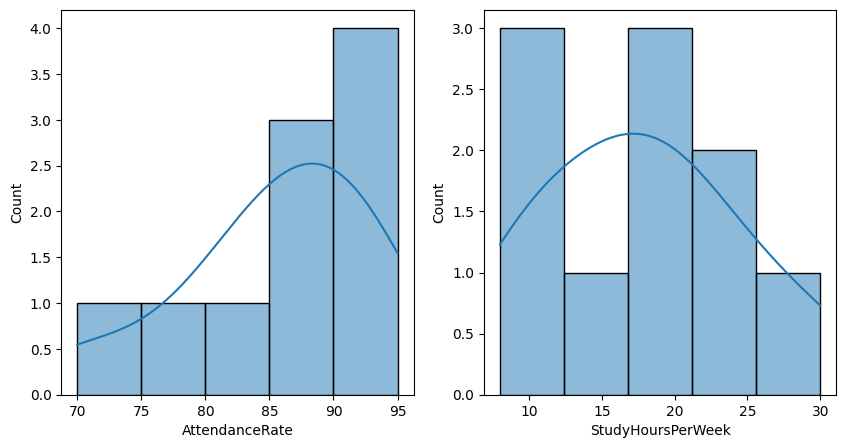

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(data=df, x='AttendanceRate', kde=True , ax=axs[0])
sns.histplot(data=df, x='StudyHoursPerWeek', kde=True, ax=axs[1])

plt.show()

In [9]:
max_final_grade = df['FinalGrade'].max()

filtered_df = df[df['FinalGrade'] == max_final_grade]

filtered_df


,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
3,4,Michael,Male,92,25,90,3,High,92


In [10]:
max_final_grade = df['FinalGrade'].min()

filtered_df = df[df['FinalGrade'] == max_final_grade]

filtered_df


,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
6,7,Daniel,Male,70,8,60,0,Low,62


# **Finding Correlations and Visualizations**

In [11]:
label_data = df.copy()

label_data['Gender'] = label_data['Gender'].map({'Male': 0, 'Female': 1})
label_data['ParentalSupport'] = label_data['ParentalSupport'].map({'Low': 0, 'Medium': 1, 'High': 2})


<Axes: >

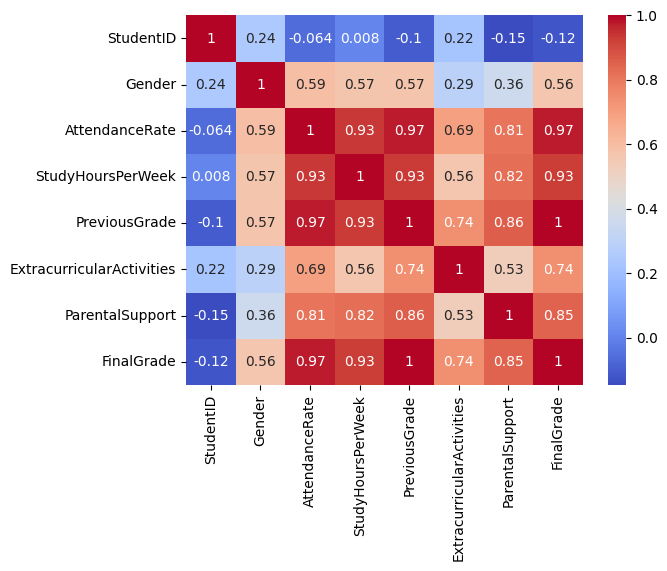

In [12]:
corr_data = label_data.drop(columns='Name')
corr_data_value = corr_data.corr()
sns.heatmap(corr_data_value, annot=True, cmap='coolwarm')

From the heatmap, it can be concluded that Previous Grade (1.00), Attendance Rate (0.97), and Study Hours Per Week (0.93) have the strongest positive correlations with the Final Grade.

# **Linear Regression**

In [13]:
#using PreviosGrade because It has the strongest positive correlations with the Final Grade.
x = df['PreviousGrade'] 
y = df['FinalGrade'] 

In [14]:
x = x.values.reshape(-1, 1)

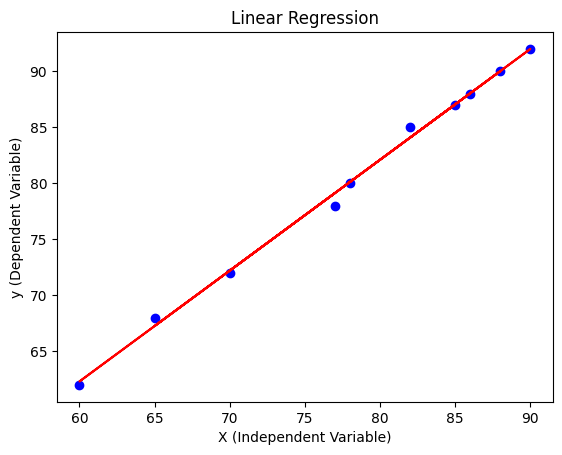

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)

plt.scatter(x, y, color='blue')  # Scatter plot of data points
plt.plot(x, model.predict(x), color='red')  # Regression line
plt.xlabel('X (Independent Variable)')
plt.ylabel('y (Dependent Variable)')
plt.title('Linear Regression')
plt.show()


# **Multiple Linear Regression**

In [16]:
X = df[['StudyHoursPerWeek', 'AttendanceRate', 'PreviousGrade']]  # Independent variables
y = df['FinalGrade']  # Dependent variable

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Optional: Show coefficients and intercept
print("Coefficients:", model.coef_)  # Weights for each independent variable
print("Intercept:", model.intercept_)

Mean Squared Error: 0.02330317313357366
Coefficients: [0.98990826]
Intercept: 2.9146788990825456


In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
model= GaussianNB()

In [23]:
model.fit(X_train,y_train)

GaussianNB()

In [30]:
print("Predictions:", y_pred)
print("True Labels:", y_test.values)

Predictions: [72.20825688 87.05688073]
True Labels: [72 87]
